# IMDB Review Classification Model - Using Hugging Face BERT , MLFLOW, WANDB, FastAPI
In the IMDB dataset from Hugging Face's `datasets` library:

- The **`label` column** represents the sentiment of the review:
  - `0`: **Negative review** (Bad review)
  - `1`: **Positive review** (Good review)


### Example:
- **Review Text**: *"The movie was amazing! The performances were top-notch."*
  - **Label**: `1` (Positive review)

- **Review Text**: *"This was a waste of time. The plot was terrible and the acting worse."*
  - **Label**: `0` (Negative review)


# Sentiment Analysis Project

## Overview
This project leverages **BERT**, **Hugging Face's Trainer**, and modern MLOps tools to build, train, evaluate, and deploy a sentiment analysis model.

---

### **Technologies Used**

1. **BERT (Bidirectional Encoder Representations from Transformers)**  
   - Pre-trained transformer model for text classification.  
   - Fine-tuned for binary sentiment analysis (Positive/Negative).

2. **Hugging Face Trainer**  
   - Simplified training and evaluation pipeline.  
   - Handles datasets, metrics, and model saving efficiently.

3. **W&B (Weights & Biases)**  
   - Tracks experiments in real-time with advanced visualizations.  
   - Used for hyperparameter optimization and team collaboration.

4. **MLflow**  
   - Manages experiment tracking, model registry, and deployment lifecycle.  
   - Tracks metrics, parameters, and artifacts for reproducibility.

5. **FastAPI**  
   - Provides an API endpoint for real-time sentiment predictions.  
   - Integrates the fine-tuned BERT model for serving predictions.

6. **Streamlit**  
   - Interactive web interface for testing predictions.  
   - Allows users to input text and view classification results.

---

### **Workflow**

1. **Model Training**  
   - Fine-tune BERT using Hugging Face Trainer.  
   - Log metrics and parameters to W&B and MLflow.

2. **Experiment Tracking**  
   - W&B for real-time visualization and hyperparameter sweeps.  
   - MLflow for model lifecycle management.

3. **Deployment**  
   - Serve the model via FastAPI for real-time inference.  
   - Build a user-friendly interface with Streamlit.

4. **Monitoring & Iteration**  
   - Continuously improve with insights from W&B and MLflow dashboards.  




Here’s a concise summary of the steps involved in building and evaluating a sentiment classification model using BERT and the Hugging Face `Trainer` library:

---

### **1. Dataset Loading and Preprocessing**
- **Dataset**: Loaded the **IMDB** dataset using Hugging Face's `datasets` library.
- **Subset Selection**: Limited to 2,000 samples each for faster experimentation.
- **Splitting**: Split the dataset into training (90%), validation (10%), and test datasets.

---

### **2. Tokenization**
- Used a **pre-trained BERT tokenizer** (`bert-base-uncased`) to tokenize the text data.
  - Added padding and truncation to ensure uniform input length.
  - Chose a **maximum length** (`max_length`) based on the dataset distribution and model constraints.

---

### **3. Model Setup**
- Initialized a pre-trained **BERT model for sequence classification** (`BertForSequenceClassification`).
  - The model was fine-tuned for binary classification (positive/negative sentiment).
  - Specified `num_labels=2` for binary classification.

---

### **4. Training Configuration**
- Defined the **TrainingArguments**:
  - Batch size, learning rate, number of epochs, and logging configuration.
  - Used `AdamW` optimizer and a linear learning rate scheduler.
- Utilized the Hugging Face **Trainer**:
  - Handled model training, validation, and evaluation loops efficiently.
  - Passed tokenized datasets (`train_data_tokenized`, `val_data_tokenized`) and model as inputs.

---

### **5. Model Training**
- Fine-tuned the BERT model using the `trainer.train()` method.
- Regularly monitored training and validation performance.

---

### **6. Evaluation**
- Used the test set to evaluate the model.
- Calculated key metrics:
  - **Accuracy**, **Precision**, **Recall**, **F1 Score** using Hugging Face's `compute_metrics` function.
  - Plotted a **confusion matrix** (True Positives, True Negatives, False Positives, False Negatives) for raw counts.

---

### **7. Error Analysis**
- **Logits Analysis**:
  - Calculated the **confidence gap** between logits for each prediction.
  - Identified and analyzed cases with the **largest confidence gap** (least confident predictions).
- **Misclassification Analysis**:
  - Highlighted samples with the worst classification performance (e.g., high confidence but incorrect prediction).
  - Analyzed the actual text and labels to identify patterns.

---

### **8. Recommendations for Improvement**
- Addressed overconfidence by:
  - Tuning thresholds for classification.
  - Investigating model predictions and edge cases.
- Suggested ways to visualize and interpret errors for actionable insights.

---

### **Visualizations**
- Plotted metrics such as **Precision**, **Recall**, and **F1 Score**.
- Displayed a **confusion matrix** as a grid with raw counts.
- Highlighted least confid



### **Key Differences: Hugging Face `Trainer` vs. PyTorch Custom Workflow**

Using the Hugging Face `Trainer` library and a custom PyTorch-based implementation represent two distinct approaches to building machine learning workflows. Here's how they differ:

---

### **1. Abstraction Level**

#### **Hugging Face `Trainer`**:
- **High-level abstraction**: Designed for rapid experimentation and reduces boilerplate code.
- Automatically handles common tasks:
  - Tokenization, batching, optimizer, scheduler setup.
  - Model training, validation, and evaluation loops.
- Ideal for researchers or practitioners who prioritize speed and simplicity.

#### **PyTorch Custom Workflow**:
- **Low-level control**: Requires manually defining every component.
- Explicitly handles:
  - **Dataloader**: Loading and batching data.
  - **NN Module**: Custom model architecture (e.g., layers).
  - Training loop: Forward pass, backward pass, and gradient updates.
- Suitable for those needing flexibility or creating custom architectures.

---

### **2. Data Handling**

#### **Hugging Face `Trainer`**:
- Tokenizes and processes datasets using `Datasets` and `DataCollator` utilities.
- Automatically integrates with `Dataset` objects for batching and data preparation.
- Encodes inputs (e.g., `input_ids`, `attention_mask`) behind the scenes.

#### **PyTorch**:
- Requires manually defining a **Dataset class** to prepare raw data.
- Uses **DataLoader** to handle batching and shuffling.
- Explicitly processes inputs and outputs before passing them to the model.

---

### **3. Model Definition**

#### **Hugging Face `Trainer`**:
- Uses pre-defined **transformer models** (e.g., `BertForSequenceClassification`) from the `transformers` library.
- Model selection involves minimal setup—just specify `num_labels` for the classification task.
- Adapts pre-trained transformer layers for downstream tasks with minimal modification.

#### **PyTorch**:
- Requires implementing a **custom `nn.Module`** class.
- Explicitly defines model layers (e.g., `nn.Linear`, `nn.Embedding`) and forward passes.
- Greater flexibility for designing new architectures or modifying base models.

---

### **4. Training Loop**

#### **Hugging Face `Trainer`**:
- Handles the training loop internally:
  - Optimizer and scheduler setup (e.g., AdamW, linear decay).
  - Automatic batching and gradient computation.
  - Built-in logging, saving checkpoints, and evaluating during training.
- Enables quick fine-tuning without writing custom loops.

#### **PyTorch**:
- Requires writing custom loops for:
  - Forward passes (`model(input_ids)`), loss computation, and backward passes.
  - Manually updating optimizer and scheduler states.
  - Handling batching, logging, and model checkpointing.
- Provides complete flexibility to modify training logic.

---

### **5. Evaluation and Metrics**

#### **Hugging Face `Trainer`**:
- Easily integrates evaluation metrics with a `compute_metrics` function.
- Automatically logs and tracks metrics such as accuracy, precision, recall, and F1 score.
- Supports integrations with tracking tools like **WandB** or **TensorBoard**.

#### **PyTorch**:
- Requires explicit implementation of evaluation loops and metric calculations.
- Metrics need to be computed manually or using libraries like `scikit-learn`.
- Logging and tracking must be integrated separately (e.g., TensorBoard, WandB).

---

### **6. Use Cases**

#### **Hugging Face `Trainer`**:
- Quick fine-tuning of pre-trained models on standard tasks (e.g., classification, NER, QA).
- Suited for researchers and practitioners needing results without delving into low-level code.
- Optimized for transfer learning workflows with pre-trained transformer models.

#### **PyTorch**:
- Ideal for custom models, architectures, or training pipelines.
- Essential for research and experimentation involving novel or non-standard tasks.
- Preferred in production environments requiring low-level control.

---

### **7. Customization and Flexibility**

#### **Hugging Face `Trainer`**:
- Limited flexibility in modifying the training loop and model structure.
- Custom logic (e.g., new loss functions) requires subclassing `Trainer`.

#### **PyTorch**:
- Full control over all components, including:
  - Model design, loss functions, optimizers, and schedulers.
  - Training loops, batching, and logging.
- Better suited for experiments requiring unconventional designs.

---

### **Summary**

| Aspect               | Hugging Face `Trainer`             | PyTorch Custom Workflow            |
|----------------------|------------------------------------|-------------------------------------|
| **Ease of Use**       | High (Plug-and-Play)              | Moderate (Write Everything)         |
| **Control**           | Moderate (Requires Subclassing)   | High (Complete Control)             |
| **Use Case**          | Fine-tuning Pre-Trained Models    | Custom Models and Architectures     |
| **Data Handling**     | Automated Tokenization/Batching   | Manual Dataset and Dataloader Setup |
| **Training Loop**     | Built-In                          | Manual Implementation               |
| **Metrics**           | Easy Integration                  | Explicit Implementation             |
| **Ideal Audience**    | Applied ML Practitioners          | Researchers and Developers          |

For this task, the `Trainer` was chosen for its simplicity and rapid implementation, leveraging pre-trained BERT for sentiment classification without having to manually implement training or evaluation loops.



















# Imports and Setup

In [1]:
import os
os.environ["TRANSFORMERS_NO_TF"] = "1"


In [2]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader
from datasets import load_dataset
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/rashijain/opt/anaconda3/envs/genai_app_env/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/rashijain/opt/anaconda3/envs/genai_app_env/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/rashijain/opt/anaconda3/envs/genai_app_env/lib/python3.12/site-packages/ipykern

# DataLoader    

In [3]:
from datasets import load_dataset
dataset = load_dataset("imdb", streaming=True)


In [4]:
# Data Loader

# Load dataset
from datasets import load_dataset
dataset = load_dataset("imdb")

# Load dataset
dataset = load_dataset("imdb")

# Limit to 2000 samples for quicker runs
train_data = dataset["train"].shuffle(seed=42).select(range(2000))
test_data = dataset["test"].shuffle(seed=42).select(range(2000))
train_data = train_data.train_test_split(test_size=0.1, seed=42)
train_data, val_data = train_data["train"], train_data["test"]

# Train and Evaluate

In [5]:
train_data

Dataset({
    features: ['text', 'label'],
    num_rows: 1800
})

In [6]:
test_data

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

# EDA

 ### Basic Summary Statistics

In [7]:
import pandas as pd

# Convert datasets to pandas DataFrames
train_df = pd.DataFrame(train_data)
val_df = pd.DataFrame(val_data)
test_df = pd.DataFrame(test_data)





# Check for missing values in the train, validation, and test data
print("Missing values in train data:")
print(train_df.isnull().sum())

print("\nMissing values in validation data:")
print(val_df.isnull().sum())

print("\nMissing values in test data:")
print(test_df.isnull().sum())



Missing values in train data:
text     0
label    0
dtype: int64

Missing values in validation data:
text     0
label    0
dtype: int64

Missing values in test data:
text     0
label    0
dtype: int64


In [8]:
train_df.head(2)

,text,label
0,"I've never been to Paris, but after seeing ""Pa...",0
1,Never viewed this film until recently on TCM a...,1


In [9]:
train_df.head(2)['text'][0]

'I\'ve never been to Paris, but after seeing "Paris, Je t\'aime" I\'m crazy to visit this city! I\'ve been to NY several times and I LOVE the city and its boroughs. I kinda expected to be touched by this film, to feel like jumping into a plane and fly there right away, but, lo and behold, I regret the time and money I spent with it. There are no love stories between people or a person and the city. There\'s a lot of dysfunctional meetings and relations or people who know each other and it just doesn\'t work out fine. Maybe this reflects a characteristic of the city, where it\'s said to have thousands of people living on their own. Can\'t you find love in New York?'

In [10]:
train_df.head(2)['text'][1]

'Never viewed this film until recently on TCM and found this story concerning Poland and a small town which had to suffer with the Nazi occupation of the local towns just like many other European Cities for example: Norway. The First World War was over and people in this town were still suffering from their lost soldiers and the wounded which War always creates. Alexander Knox, ( Wilhelm Gimm)"Gorky Park" returns from the war with a lost leg and was the former school teacher in town. He was brought up a German and was not very happy with the Polish people and they in turn did not fully accept him either. As the Hitler party grew to power Wilhelm Grimm desired to become a Nazi in order to return and punish this small Polish town for their treatment towards him which was really all in his mind. Marsha Hunt,(Marja Pacierkowski),"Chloe\'s Prayer", played an outstanding role as a woman who lost her husband and was romantically involved with Whilhelm Gimm. There are many flashbacks and some 

### Check for Duplicates

In [11]:
# Check for duplicates in the train, validation, and test data
print("Duplicates in Train Data:", train_df.duplicated().sum())
print("Duplicates in Validation Data:", val_df.duplicated().sum())
print("Duplicates in Test Data:", test_df.duplicated().sum())


Duplicates in Train Data: 0
Duplicates in Validation Data: 0
Duplicates in Test Data: 1


### Check Label Distribution

In [12]:
# Check label distribution in train, validation, and test datasets
print("Train Label Distribution:")
print(train_df['label'].value_counts())

print("\nValidation Label Distribution:")
print(val_df['label'].value_counts())

print("\nTest Label Distribution:")
print(test_df['label'].value_counts())


Train Label Distribution:
label
1    907
0    893
Name: count, dtype: int64

Validation Label Distribution:
label
0    107
1     93
Name: count, dtype: int64

Test Label Distribution:
label
1    1000
0    1000
Name: count, dtype: int64


###  Text Length Distribution

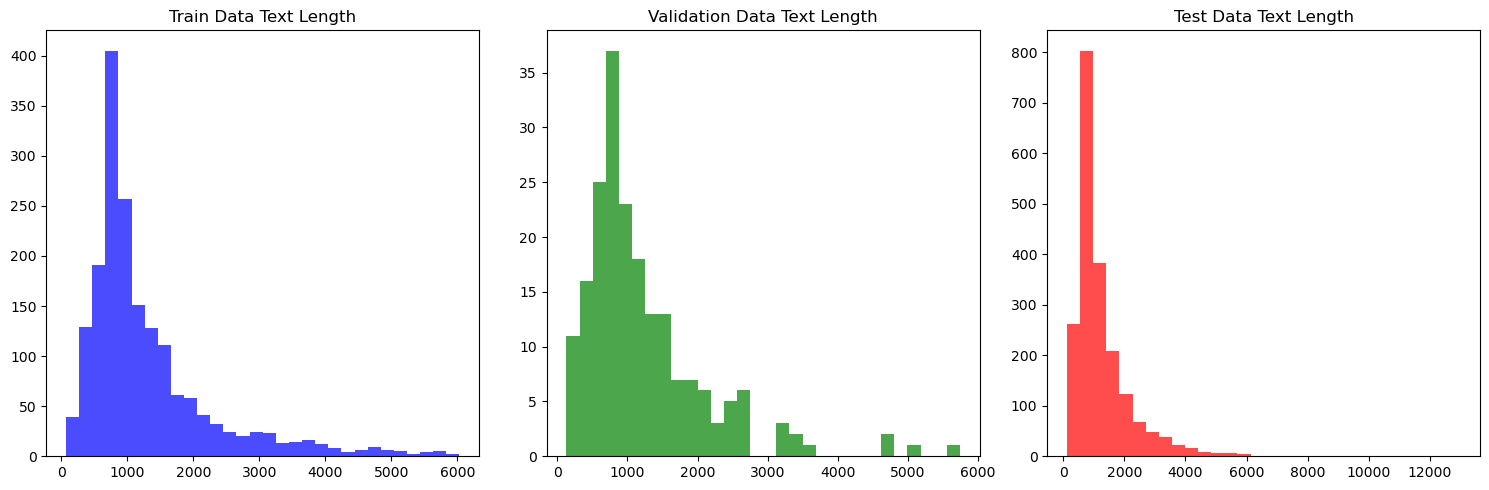

In [13]:
# Add text length column
train_df['text_length'] = train_df['text'].apply(len)
val_df['text_length'] = val_df['text'].apply(len)
test_df['text_length'] = test_df['text'].apply(len)

# Plot histograms of text length for train, validation, and test sets
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(train_df['text_length'], bins=30, color='blue', alpha=0.7)
plt.title('Train Data Text Length')

plt.subplot(1, 3, 2)
plt.hist(val_df['text_length'], bins=30, color='green', alpha=0.7)
plt.title('Validation Data Text Length')

plt.subplot(1, 3, 3)
plt.hist(test_df['text_length'], bins=30, color='red', alpha=0.7)
plt.title('Test Data Text Length')

plt.tight_layout()
plt.show()


### Label Distribution Plot

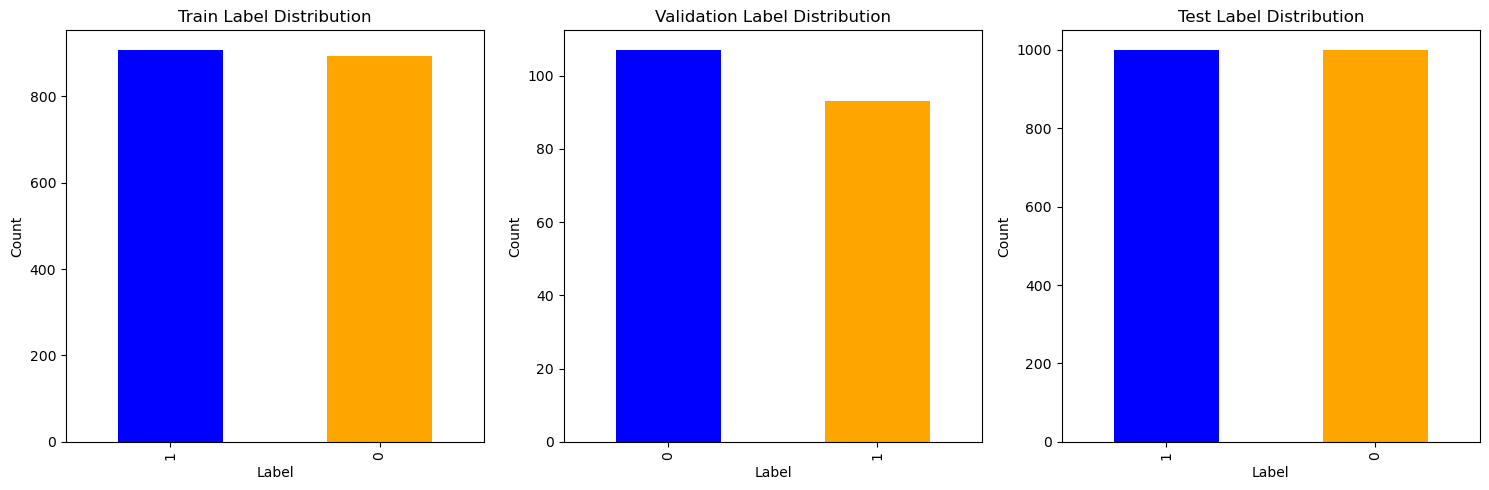

In [14]:
# Plot label distribution for train, validation, and test datasets
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(15, 5))

# Train Label Distribution
plt.subplot(1, 3, 1)
train_df['label'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Train Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# Validation Label Distribution
plt.subplot(1, 3, 2)
val_df['label'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Validation Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# Test Label Distribution
plt.subplot(1, 3, 3)
test_df['label'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Test Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


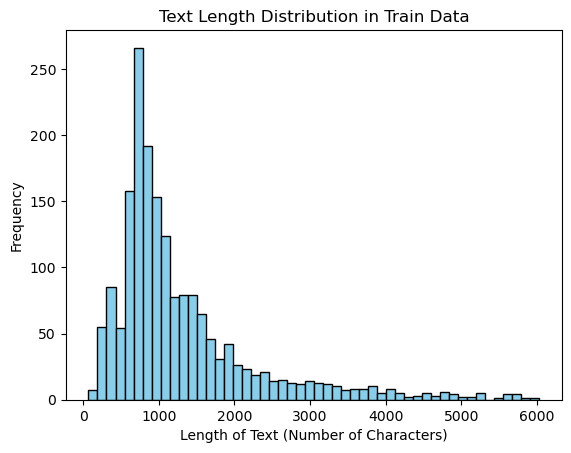

Maximum text length: 6032
Average text length: 1300.3633333333332


In [15]:
# Calculate the length of each text in the train dataset
train_df['text_length'] = train_df['text'].apply(len)

# Plot the text length distribution
import matplotlib.pyplot as plt

plt.hist(train_df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution in Train Data')
plt.xlabel('Length of Text (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

# Get the maximum and average length of the texts
print("Maximum text length:", train_df['text_length'].max())
print("Average text length:", train_df['text_length'].mean())


Conclusion:
Start with max_length=512 as a baseline, since it is efficient and works well for most transformer models.
If your model supports longer sequences, try max_length=1024 and observe the effect on performance.
Consider the nature of your dataset and the importance of longer context before deciding on a larger max_length.


* Truncation
Truncation will be applied to any text longer than the chosen max_length. If you set max_length=512 and have text lengths of 1300 on average, it will truncate the input text to the first 512 tokens.
The decision about truncation can be made based on the nature of your task:
If long texts contain significant information at the end (e.g., conclusions, summaries), you might want to truncate at the beginning of the text (truncation=True, truncation_strategy='longest_first'), retaining the important context at the end.
If the start of the text is more important (e.g., in classification tasks where the beginning might contain key context), keep the beginning and discard the end.


## DataPrepration

### Tokenization using Hugging Face’s Tokenizer

In [16]:
from transformers import BertTokenizer

# Initialize the tokenizer for BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the data and generate attention masks
def tokenize_function(examples):
    return tokenizer(
        examples['text'],
        padding="max_length",       # Pads the sequence to max_length
        truncation=True,             # Truncates sequences longer than max_length
        max_length=128,             # Sets max length of the sequences
        return_attention_mask=True  # Return attention mask along with input_ids
    )

# Apply tokenization to the train, validation, and test datasets
train_data_tokenized = train_data.map(
    lambda x: {**tokenize_function(x), "labels": x["label"]}, 
    batched=True
)
val_data_tokenized = val_data.map(
    lambda x: {**tokenize_function(x), "labels": x["label"]}, 
    batched=True
)
test_data_tokenized = test_data.map(
    lambda x: {**tokenize_function(x), "labels": x["label"]}, 
    batched=True
)

# Check the tokenized output (input_ids and attention_mask)
print(f"Example tokenized input_ids: {train_data_tokenized[0]['input_ids']}")
print(f"Example attention_mask: {train_data_tokenized[0]['attention_mask']}")






Example tokenized input_ids: [101, 1045, 1005, 2310, 2196, 2042, 2000, 3000, 1010, 2021, 2044, 3773, 1000, 3000, 1010, 15333, 1056, 1005, 6614, 2063, 1000, 1045, 1005, 1049, 4689, 2000, 3942, 2023, 2103, 999, 1045, 1005, 2310, 2042, 2000, 6396, 2195, 2335, 1998, 1045, 2293, 1996, 2103, 1998, 2049, 21413, 1012, 1045, 17704, 3517, 2000, 2022, 5028, 2011, 2023, 2143, 1010, 2000, 2514, 2066, 8660, 2046, 1037, 4946, 1998, 4875, 2045, 2157, 2185, 1010, 2021, 1010, 8840, 1998, 27541, 1010, 1045, 9038, 1996, 2051, 1998, 2769, 1045, 2985, 2007, 2009, 1012, 2045, 2024, 2053, 2293, 3441, 2090, 2111, 2030, 1037, 2711, 1998, 1996, 2103, 1012, 2045, 1005, 1055, 1037, 2843, 1997, 28466, 2389, 6295, 1998, 4262, 2030, 2111, 2040, 2113, 2169, 2060, 1998, 2009, 2074, 2987, 1005, 1056, 2147, 2041, 2986, 102]
Example attention_mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

#### Explanation: 
* Tokenizer: The BertTokenizer converts text into tokens (integers), where each integer corresponds to a specific word piece or token from the vocabulary.
* Padding and Truncation: We ensure each input is the same length (max_length=512), which is the standard for BERT.
* input_ids: These are the tokenized representations of the text, which you can use as input for embedding generation or model training.

The **max length** parameter for tokenization is the maximum number of tokens that the tokenizer will generate for each input text. This parameter determines how much of the input text is considered when transforming it into token IDs.

### How is the `max_length` determined?

1. **Model Constraints**: Many transformer models, such as BERT, RoBERTa, and others, have a **maximum input length** they can handle. For instance:
   - **BERT**: The maximum length of input sequences is 512 tokens.
   - **RoBERTa**: Similarly, RoBERTa also has a maximum sequence length of 512 tokens.
   - **DistilBERT**: Has a maximum sequence length of 512 tokens as well.

   This is typically defined by the architecture of the model and is a hard limit.

2. **Length of Text**: If you use a `max_length` that is longer than the length of your input text, the tokenizer will pad the text to that length. If the text is shorter than `max_length`, padding tokens (usually with `0` or a special padding token) are added.

3. **Truncation**: If the input text exceeds the `max_length`, the tokenizer will truncate the text, keeping only the first `max_length` tokens. This means that some part of the input text will be discarded.

4. **Context Considerations**: The maximum sequence length can also be influenced by the nature of the problem:
   - For **short texts** like movie reviews (like in your example), a smaller max length (e.g., 128 or 256) may suffice.
   - For **longer documents**, you may want to use the maximum sequence length (e.g., 512) to ensure the entire context of the text is captured, but this can introduce inefficiency in processing longer sequences.

### How to Set `max_length`?

1. **Default Model Length**: Often, you can rely on the model's default maximum length, which is typically 512 for most transformer models like BERT. In the case of BERT, the `max_length` should ideally not exceed 512 tokens.

2. **Analyzing Text Lengths**: You can analyze the distribution of text lengths in your dataset and decide the `max_length` based on this. For example, if most texts in your dataset are short (less than 100 tokens), setting a `max_length` of 128 or 256 might be more efficient.

3. **Adjusting for Performance**: Setting a smaller `max_length` can reduce memory usage and speed up training, especially if your model frequently processes long documents. However, truncating too much information might hurt performance if the text contains crucial information that is beyond the truncation threshold.

### Example: Checking the Text Length Distribution
Before setting a `max_length`, it’s helpful to look at the distribution of text lengths to decide the best value. Here’s how you can visualize the length distribution:

```python
# Calculate the length of each text in the train dataset
train_df['text_length'] = train_df['text'].apply(len)

# Plot the text length distribution
import matplotlib.pyplot as plt

plt.hist(train_df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution in Train Data')
plt.xlabel('Length of Text (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

# Get the maximum and average length of the texts
print("Maximum text length:", train_df['text_length'].max())
print("Average text length:", train_df['text_length'].mean())
```

### Key Takeaways:
- **Maximum length** depends on the model architecture (e.g., BERT has 512 tokens as the max).
- Texts longer than the max length will be truncated; shorter texts will be padded.
- For practical purposes, you can set `max_length` based on the text length distribution in your dataset. If most of your texts are shorter than 100 tokens, you can choose a smaller `max_length` (e.g., 128), but if there’s a significant portion that exceeds, consider setting it to 256 or 512.

Let me know if you need more clarification or assistance with setting the `max_length`!

 ### Attention Mask
 
 When the text sequences are shorter than the `max_length` and padded), you should also provide an **attention mask**. The attention mask tells the model which tokens are real (non-padding) and which tokens are padding, so that the model does not pay attention to padded tokens during processing.

### What is an Attention Mask?
- An **attention mask** is a binary tensor of the same length as the input sequence, where:
  - `1` indicates a real token (i.e., a token that should be attended to).
  - `0` indicates a padding token (i.e., a token that should be ignored by the model during processing).

This mask is essential for models like BERT, as they need to know which tokens are padding and which are actual text to avoid attending to the padding during calculations.


## Embedding Generation - NOT REQUIRED

The embeddings are generated from the last_hidden_state output of the model, which represents the contextualized token embeddings.

BERT generates embeddings automatically during its forward pass, and you can directly use those embeddings for tasks like classification without explicitly extracting them first. Let's clarify **why embeddings are generated explicitly in some workflows** versus **why you might skip that step and directly fine-tune BERT for classification**.

---

#### **Why Generate Embeddings?**

1. **Feature Extraction for Other Models or Tasks**:
   - Sometimes, you may want to use BERT’s embeddings as input features for downstream models like Random Forests, SVMs, or lightweight neural networks. For example:
     - You could use embeddings to perform clustering (e.g., k-means).
     - Use them for retrieval tasks where you calculate similarity between embeddings.
   - In such cases, you extract the embeddings (from the last hidden state or the `[CLS]` token) and process them separately.

2. **Task-Specific Representations**:
   - By taking embeddings from the **last hidden state**, you can process them in a custom way:
     - Pool embeddings for specific tokens.
     - Use averaging or weighted pooling for sentence-level representations.
   - This approach offers flexibility in defining how you want to represent your text for a specific task.

3. **Efficiency for Non-End-to-End Pipelines**:
   - If you’re working with a task where BERT is only used as a feature extractor (not fine-tuned), this method avoids re-computing embeddings every time during training. You compute embeddings once and save them for reuse.

---

#### **Why Use BERT Directly for Classification?**

If your end goal is **classification**, it’s often better to use BERT directly, fine-tuning it on your specific dataset. Here's why:

1. **End-to-End Training**:
   - Fine-tuning BERT allows it to adjust its weights specifically for your task, improving performance. For example:
     - In sentiment analysis, BERT can learn to emphasize sentiment-bearing words during fine-tuning.
   - By training the classification layer and the BERT encoder jointly, you ensure the embeddings are optimized for your task.

2. **Built-In Classification Head**:
   - BERT provides a **classification head** on top of the `[CLS]` token. This is specifically designed for tasks like sentiment analysis or binary classification. Fine-tuning updates both the classification head and BERT weights to align with your task.

3. **Simplicity**:
   - Using BERT for direct classification simplifies the pipeline. Instead of extracting embeddings and training a separate model, you just fine-tune BERT with minimal preprocessing.

---

#### **When to Choose Which Approach?**

| **Approach**                  | **Use Case**                                                                                     |
|--------------------------------|--------------------------------------------------------------------------------------------------|
| **Embedding Extraction**       | - You need embeddings for tasks like clustering, similarity search, or hybrid pipelines.<br> - You want to use BERT features with other ML models (e.g., Random Forests). <br> - Computational constraints prevent fine-tuning. |
| **Direct BERT Fine-Tuning**    | - Your goal is task-specific classification (e.g., sentiment analysis, text classification). <br> - You have labeled data for supervised fine-tuning. <br> - You want the best possible performance from BERT.                      |

---

#### **Summary**
1. **Why generate embeddings manually?**
   - For non-end-to-end tasks or when embeddings are reused for other purposes (e.g., clustering or similarity).

2. **Why use BERT directly for classification?**
   - For task-specific fine-tuning and better performance in supervised learning tasks.

If your task is **sentiment analysis**, you should likely fine-tune BERT for classification unless you have a specific reason to extract embeddings.



In [17]:
# ##### Not Required ####


# import torch
# from transformers import BertTokenizer, BertModel

# model = BertModel.from_pretrained('bert-base-uncased')



# # Convert to PyTorch tensors for embedding generation
# def generate_embeddings(data):
#     input_ids = torch.tensor(data['input_ids'])  # Input IDs
#     attention_mask = torch.tensor(data['attention_mask'])  # Attention mask
    
#     with torch.no_grad():
#         outputs = model(input_ids, attention_mask=attention_mask)  # Forward pass with attention mask
#         embeddings = outputs.last_hidden_state  # Get the last hidden state as embeddings
    
#     return embeddings

# # Generate embeddings for train, validation, and test sets
# train_embeddings = generate_embeddings(train_data_tokenized)
# val_embeddings = generate_embeddings(val_data_tokenized)
# test_embeddings = generate_embeddings(test_data_tokenized)

# # Check the shape of the embeddings for one sample (batch size, sequence length, hidden size)
# print(f"Train embeddings shape: {train_embeddings.shape}")
# print(f"Validation embeddings shape: {val_embeddings.shape}")
# print(f"Test embeddings shape: {test_embeddings.shape}")


#### Embedding Visualization

In [18]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# # Convert embeddings to 2D using t-SNE
# def visualize_embeddings(embeddings, labels):
#     # We take the mean of the token embeddings for each sentence
#     sentence_embeddings = embeddings.mean(dim=1).numpy()  # Shape: (num_samples, hidden_size)

#     # Perform t-SNE to reduce to 2D
#     tsne = TSNE(n_components=2, random_state=42)
#     tsne_results = tsne.fit_transform(sentence_embeddings)

#     # Plot the results
#     plt.figure(figsize=(10, 8))
#     scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.7)
#     plt.title("t-SNE of Sentence Embeddings")
#     plt.xlabel("t-SNE Dimension 1")
#     plt.ylabel("t-SNE Dimension 2")
#     plt.colorbar(scatter)
#     plt.show()

# # Example: Visualizing train set embeddings (assuming labels are available as train_data_tokenized['label'])
# visualize_embeddings(train_embeddings, train_data_tokenized['label'])


Embedding plot visualization is useful for understanding the **distribution of data** in a lower-dimensional space. Here’s how and why it's valuable, especially in NLP tasks:

### Example Interpretation of a Plot

Let’s say you visualize sentiment embeddings using **t-SNE**:

1. **Clusters**: 
   - Positive and negative reviews form distinct, compact clusters. This suggests that the embeddings capture sentiment well.

   Example:
   ```
   Positive Reviews: Cluster 1 (top right)
   Negative Reviews: Cluster 2 (bottom left)
   ```

2. **Overlap**:
   - If some points from the positive and negative clusters overlap, it might indicate:
     - Ambiguous samples (e.g., mixed sentiment).
     - Issues in tokenization or model architecture.

3. **Outliers**:
   - Points far from any cluster could indicate noisy data, such as typos or very short/long reviews.

---

#### Should You Always Visualize?
Not necessarily. Visualization is a **diagnostic tool**:
- Use it to **explore data quality** and **understand patterns**.
- Once you're confident in the embeddings, proceed to model training and evaluation.

---

#### Final Note
Embedding visualization isn’t always necessary for production but can be **invaluable for debugging** and understanding your data/model pipeline. Let me know if you want a concrete example with code and walkthrough!

In [19]:
# import wandb
# wandb.init(project="bert-fine-tuning", settings=wandb.Settings(init_timeout=120))



from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Train the Model

In [20]:
import os
import mlflow

# Set MLflow tracking URI to a local writable directory
mlflow_tracking_dir = os.path.abspath("./mlruns")  # Ensure it's a writable directory
mlflow.set_tracking_uri(f"file://{mlflow_tracking_dir}")

# Set experiment
mlflow.set_experiment("Sentiment Analysis with BERT v2")


<Experiment: artifact_location='file:///Users/rashijain/Documents/GitHub/SentimentPredictionML/mlruns/484606433662049821', creation_time=1738128933836, experiment_id='484606433662049821', last_update_time=1738128933836, lifecycle_stage='active', name='Sentiment Analysis with BERT v2', tags={}>

In [21]:
os.makedirs("./results", exist_ok=True)
os.makedirs("./logs", exist_ok=True)


In [ ]:
import mlflow
import mlflow.pytorch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Initialize MLflow tracking
mlflow.set_experiment("Sentiment Analysis with BERT v2")

# Function to compute metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    accuracy = accuracy_score(labels, predictions)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",        # Directory to save the final model
    logging_dir="./logs",          # Directory for TensorBoard logs
    save_strategy="steps",         # Save model after certain steps
    save_steps=500,                # Save checkpoint every 500 steps
    save_total_limit=3,            # Keep only the last 3 checkpoints
    logging_steps=50,              # Log metrics every 50 steps
    evaluation_strategy="steps",   # Evaluate periodically during training
    eval_steps=500,                # Run evaluation every 500 steps
    load_best_model_at_end=True,   # Load the best checkpoint at the end
    metric_for_best_model="accuracy", # Metric to determine the best checkpoint
    save_on_each_node=False,       # Save checkpoints only on the main node
    report_to="tensorboard",       # Log to TensorBoard
)

# Define model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data_tokenized,
    eval_dataset=val_data_tokenized,
    compute_metrics=compute_metrics
)

# MLflow integration for training
with mlflow.start_run() as run:
    # Log training parameters
    
    
    
    tokenizer.save_pretrained("tokenizer")
    mlflow.log_artifacts("tokenizer", artifact_path="tokenizer")


    mlflow.log_param("model_name", "bert-base-uncased")
    mlflow.log_param("num_labels", 2)
    mlflow.log_param("batch_size", training_args.per_device_train_batch_size)
    mlflow.log_param("epochs", training_args.num_train_epochs)
    mlflow.log_param("learning_rate", training_args.learning_rate)

    # Train the model
    trainer.train()

    # Evaluate the model
    metrics = trainer.evaluate()
    
    # Log evaluation metrics
    for metric_name, value in metrics.items():
        mlflow.log_metric(metric_name, value)

    # Save the trained model to MLflow
    mlflow.pytorch.log_model(model, "model")

    # Optionally, log additional files like the tokenizer
    tokenizer.save_pretrained("./results/tokenizer")
    mlflow.log_artifacts("./results/tokenizer", artifact_path="tokenizer")

# Output MLflow run information
print(f"Run ID: {run.info.run_id}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2025/01/29 19:30:54 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Cmd('git') failed due to: exit code(69)
  cmdline: git version
  stderr: 'You have not agreed to the Xcode license agreements. Please run 'sudo xcodebuild -license' from within a Terminal window to review and agree to the Xcode and Apple SDKs license.'


Step,Training Loss,Validation Loss


# Evaluate the Model

In [27]:
# Evaluate on validation data
eval_results = trainer.evaluate()
print(eval_results)

for metric_name, metric_value in eval_results.items():
    mlflow.log_metric(f"val_{metric_name}", metric_value)


NameError: name 'trainer' is not defined

 # Test the Model

In [28]:
# Evaluate on test data
test_results = trainer.evaluate(test_data_tokenized)
print(test_results)

for metric_name, metric_value in test_results.items():
        mlflow.log_metric(f"test_{metric_name}", metric_value)


NameError: name 'trainer' is not defined

## Analyze the Worst Residuals
Identify the Worst Residuals
Residuals are the difference between true labels and predictions. You can evaluate these after the test set evaluation:

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Get predictions on test set
predictions = trainer.predict(test_data_tokenized)

# Extract logits, true labels, and predicted labels
logits = predictions.predictions
labels = predictions.label_ids
predicted_labels = logits.argmax(axis=-1)

# Compute metrics
accuracy = accuracy_score(labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(labels, predicted_labels, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(labels, predicted_labels))


  0%|          | 0/250 [00:00<?, ?it/s]

Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.84      0.84      0.84      1000

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(labels, predicted_labels)
tn, fp, fn, tp = conf_matrix.ravel()

# Print confusion matrix components
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")


True Positives (TP): 845
True Negatives (TN): 843
False Positives (FP): 157
False Negatives (FN): 155


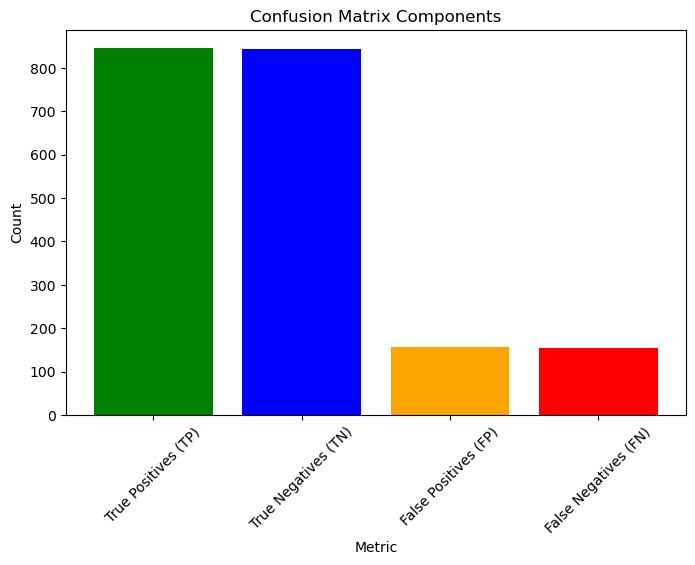

In [ ]:
# Data for the plot
categories = ['True Positives (TP)', 'True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)']
values = [tp, tn, fp, fn]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['green', 'blue', 'orange', 'red'])
plt.title("Confusion Matrix Components")
plt.ylabel("Count")
plt.xlabel("Metric")
plt.xticks(rotation=45)
plt.show()


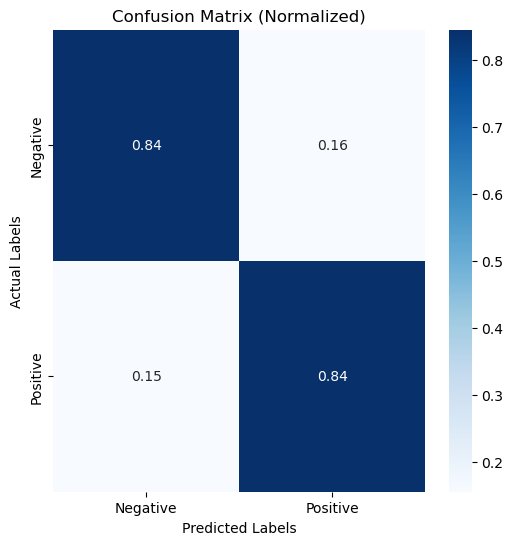

In [ ]:
import seaborn as sns
import numpy as np

# Normalize the confusion matrix for better interpretability
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix (Normalized)")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()


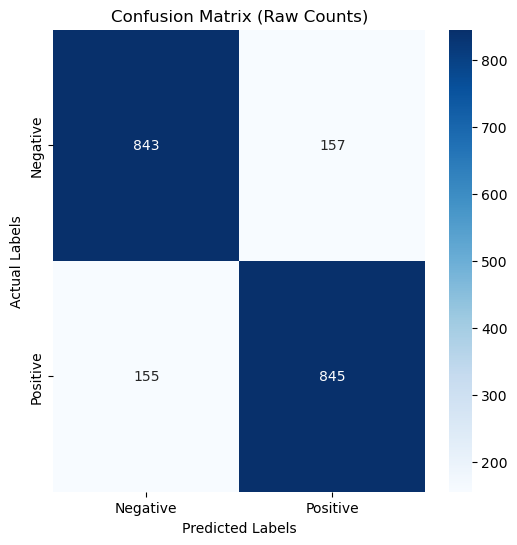

In [ ]:
# Plot confusion matrix heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Add titles and labels
plt.title("Confusion Matrix (Raw Counts)")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()


## Analyze Worst Logits
To analyze the least confident predictions (e.g., closest to the decision boundary), find the logits with minimal absolute differences between the two highest values:

In [ ]:
# Calculate confidence gap
confidence_gaps = np.abs(logits[:, 0] - logits[:, 1])

# Identify incorrect predictions
incorrect_indices = [i for i, (true, pred) in enumerate(zip(labels, predicted_labels)) if true != pred]

# Filter for incorrect predictions and their confidence gaps
incorrect_gaps = [(idx, confidence_gaps[idx]) for idx in incorrect_indices]

# Find the index of the incorrect prediction with the largest confidence gap
if incorrect_gaps:
    worst_idx, max_gap = max(incorrect_gaps, key=lambda x: x[1])

    # Print details of the worst misclassification
    worst_idx = int(worst_idx)  # Ensure compatibility with HuggingFace datasets
    print(f"Text: {test_data[worst_idx]['text']}")
    print(f"True Label: {labels[worst_idx]}, Predicted: {predicted_labels[worst_idx]}")
    print(f"Logits: {logits[worst_idx]}")
    print(f"Confidence Gap: {max_gap}")
else:
    print("No incorrect predictions found.")


Text: Earnest effort which achieves some success to adapt the classic Odyssey story to a '30's nostalgia period piece. The adventurers this time are escaped convicts, wandering about the Depression afflicted South bungling their way into trouble.<br /><br />The greatest strength of the film is the wonderful music soundtrack, effectively evoking not only the era that this is set in, but the spiritual references that run rampant in the film. Besides its value to the tone of the movie, the music is just plain fun to listen to.<br /><br />What cripples the film is that the characters really aren't that likable. In a comedy, you need that element in order to have fun along with them in their misadventures. Instead, we have a bunch of selfish, arrogant, soulless, mean spirited nobodies who really have no positive points at all. They're not imposing enough to make you hate them either, so it's hard to relate to them at all. They're offered up as clowns, but like people who put clown makeup on

# Save the Model (not required- saved using MLFLOW)

 Use Hugging Face's built-in save_pretrained() method to save the model, tokenizer, and configuration files.


 This will save:

* The model weights (pytorch_model.bin).
* The model configuration (config.json).
* The tokenizer files (vocab.txt, tokenizer.json, etc.).

Saving the Best Checkpoint- If you've enabled load_best_model_at_end=True in your training arguments, you can save the best checkpoint:

In [34]:
best_checkpoint_dir = trainer.state.best_model_checkpoint
trainer.save_model(f"{best_checkpoint_dir}/final_best_model")


NameError: name 'trainer' is not defined

# Checking the loading of model for API Use

## Generalization for Inference:

AutoModelForSequenceClassification is a generic model class that automatically detects and loads a model architecture (e.g., BERT, RoBERTa, etc.) from a saved checkpoint, assuming it was fine-tuned for classification tasks.
This ensures that the code for inference is model-agnostic, meaning you can easily switch to another pre-trained or fine-tuned model without changing the loading code.

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load model and tokenizer
# Set MLflow tracking URI to the local mlruns directory
mlflow.set_tracking_uri("file:///C:/Users/s0n0611/Documents/Data Science Work/Github/the-incredible-pytorch/mlruns")

# Update this line with the correct model URI
logged_model = "models:/SentimentAnalysisModel/1"  # Replace with your model's name and version

# Load the model as a PyFunc model
model = mlflow.pyfunc.load_model(logged_model)


tokenizer = AutoTokenizer.from_pretrained("./final_model")

# Example usage
text = "This movie was great!"
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs)
predicted_class = outputs.logits.argmax().item()

print("PredictedClass", predicted_class)

OSError: [Errno 30] Read-only file system: '/C:'

## Exporting to TorchScript (Optional)
For certain APIs or deployment environments, exporting the model to TorchScript can improve performance.


Compress Models: Use tools like ONNX or TorchScript to reduce model size and improve inference speed.

In [ ]:
# import torch

# # Export to TorchScript
# scripted_model = torch.jit.script(model)
# scripted_model.save("./final_model/model.pt")


# Integrating Saved model with API

In [ ]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def read_root():
    return {"message": "Hello, World!"}


In [ ]:
from fastapi import FastAPI
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

app = FastAPI()

# Load model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("./final_model")
tokenizer = AutoTokenizer.from_pretrained("./final_model")

@app.post("/predict/")
def predict(text: str):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits, dim=-1).item()
    return {"text": text, "predicted_class": predicted_class}


# Modular API Creation (this part to be done in app.py in the notebook location)

We'll use FastAPI to create a lightweight API that accepts input from the UI and returns predictions from your model. FastAPI is Python-based, easy to set up, and integrates well with models like yours.



In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import torch
from transformers import AutoTokenizer
import mlflow.pyfunc

# Set MLflow tracking URI to the local mlruns directory
mlflow.set_tracking_uri("file:///C:/Users/s0n0611/Documents/Data Science Work/Github/the-incredible-pytorch/mlruns")

# Update this line with the correct model URI
logged_model = "models:/SentimentAnalysisModel/1"  # Replace with your model's name and version

# Load the model as a PyFunc model
model = mlflow.pyfunc.load_model(logged_model)

# Load tokenizer separately if needed (assuming tokenizer is stored locally)
tokenizer = AutoTokenizer.from_pretrained("./final_model")  # Adjust if tokenizer is saved differently

# FastAPI application
app = FastAPI()

class TextInput(BaseModel):
    text: str

@app.post("/predict")
async def predict(input_data: TextInput):
    # Tokenize input
    inputs = tokenizer(input_data.text, return_tensors="pt", truncation=True, padding=True)
    
    # Model prediction
    logits = model.predict(inputs)  # Adjust if the model is wrapped differently in MLflow
    predicted_class = torch.argmax(torch.tensor(logits), dim=-1).item()

    # Convert numeric label to text
    sentiment = "Positive" if predicted_class == 1 else "Negative"

    return {"prediction": predicted_class, "sentiment": sentiment}

# Perform Predictions
To make predictions on new data, tokenize the input and use the trained model:



In [ ]:
inputs = tokenizer(
    ["Example sentence for classification."],
    padding="max_length",
    truncation=True,
    return_tensors="pt"
)

outputs = model(**inputs)
logits = outputs.logits
predictions = torch.argmax(logits, dim=-1)
print(predictions)  # Class label


tensor([1])
